In [31]:
from google.colab import drive

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [32]:
import pandas as pd
df = pd.read_csv('/drive/MyDrive/mvc.csv')

In [33]:
import sys
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
from pandas_profiling import ProfileReport
profile_df = ProfileReport(df, title="mvc", html={'style' : {'full_width':True}})
profile_df.to_file(output_file="mvc.html")

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
profile_df

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                18957 non-null  int64  
 1   ACCNUM             14027 non-null  float64
 2   DATE               18957 non-null  object 
 3   TIME               18957 non-null  int64  
 4   STREET1            18957 non-null  object 
 5   STREET2            17251 non-null  object 
 6   OFFSET             3820 non-null   object 
 7   ROAD_CLASS         18471 non-null  object 
 8   DISTRICT           18728 non-null  object 
 9   ACCLOC             13501 non-null  object 
 10  TRAFFCTL           18882 non-null  object 
 11  VISIBILITY         18933 non-null  object 
 12  LIGHT              18953 non-null  object 
 13  RDSFCOND           18928 non-null  object 
 14  ACCLASS            18956 non-null  object 
 15  IMPACTYPE          18930 non-null  object 
 16  INVTYPE            189

In [36]:
def check_unique(df):
    for column in df.columns:
        if len(df[column].unique()) != len(df[column]):
            return False
    return True
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values: {column} : {unique_values}")

Unique values: _id : [    1     2     3 ... 18955 18956 18957]
Unique values: ACCNUM : [8.93184000e+05 9.09646000e+05 8.84090000e+05 ... 3.00295735e+09
 3.00297103e+09 3.00297809e+09]
Unique values: DATE : ['2006-01-01' '2006-01-02' '2006-01-04' ... '2023-12-26' '2023-12-28'
 '2023-12-29']
Unique values: TIME : [ 236  315  705 ... 1839  346  411]
Unique values: STREET1 : ['WOODBINE AVE' 'DANFORTH AVE' 'BATHURST ST' ... 'ANNDALE DR'
 'HAREWOOD AV' 'DONSIDE DR']
Unique values: STREET2 : ['O CONNOR DR' 'WEST LYNN AVE' 'DUNDAS ST W' ... 'LAWRENCE AV WEST'
 'FISHER ST' 'MAYBOURNE AV']
Unique values: OFFSET : [nan '60 NORTH OF' '1 m West of' '234 m South ' '450 m West o'
 '7 m West of' '314 m  of' '192 m East o' '2 m North of' '100 m East o'
 '51 m South o' '43 m West of' '5 m North of' '8 m North of' '6 m West of'
 '30 m North o' '25 m East of' '60 m East of' '44 m North o'
 '132 m West o' '48 m East of' '30 m South o' '500 m East o'
 '1 m North of' '58 m North o' '500 m North ' '12 m West 

In [37]:
df.describe()

_id        ACCNUM          TIME    FATAL_NO
count  18957.000000  1.402700e+04  18957.000000  870.000000
mean    9479.000000  5.576714e+08   1364.956428   28.752874
std     5472.558862  1.180026e+09    631.310388   17.657001
min        1.000000  2.530100e+04      0.000000    1.000000
25%     4740.000000  1.034561e+06    924.000000   14.000000
50%     9479.000000  1.220029e+06   1450.000000   27.500000
75%    14218.000000  1.386958e+06   1852.000000   42.000000
max    18957.000000  4.008024e+09   2359.000000   78.000000

In [30]:
df['GROUP'] = 0
group_id = 1
for i in range(len(df)):
    if df.at[i, 'GROUP'] == 0:
        df.at[i, 'GROUP'] = group_id
        for j in range(i + 1, len(df)):
            if (df.at[i, 'DATE'] == df.at[j, 'DATE']) and (df.at[i, 'TIME'] == df.at[j, 'TIME']) and (df.at[i, 'STREET1'] == df.at[j, 'STREET1']) and (df.at[i, 'STREET2'] == df.at[j, 'STREET2']):
                df.at[j, 'GROUP'] = group_id
        group_id += 1

df['ACCNUM'] = df['GROUP']

cols = ['STREET2', 'OFFSET', 'ROAD_CLASS','DISTRICT','ACCLOC','TRAFFCTL','VISIBILITY','LIGHT','RDSFCOND','ACCLASS','IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER' ,'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST' ,'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']
df[cols] = df[cols].fillna('0')
print(df)


         _id  ACCNUM        DATE  TIME       STREET1       STREET2 OFFSET  \
0          1       1  2006-01-01   236  WOODBINE AVE   O CONNOR DR      0   
1          2       1  2006-01-01   236  WOODBINE AVE   O CONNOR DR      0   
2          3       1  2006-01-01   236  WOODBINE AVE   O CONNOR DR      0   
3          4       1  2006-01-01   236  WOODBINE AVE   O CONNOR DR      0   
4          5       1  2006-01-01   236  WOODBINE AVE   O CONNOR DR      0   
...      ...     ...         ...   ...           ...           ...    ...   
18952  18953    6862  2023-12-26  2008    MCCOWAN RD  ELLESMERE RD      0   
18953  18954    6863  2023-12-28  1911   DUFFERIN ST     FISHER ST      0   
18954  18955    6863  2023-12-28  1911   DUFFERIN ST     FISHER ST      0   
18955  18956    6864  2023-12-29  1829    DONSIDE DR  MAYBOURNE AV      0   
18956  18957    6864  2023-12-29  1829    DONSIDE DR  MAYBOURNE AV      0   

           ROAD_CLASS               DISTRICT                ACCLOC  ...  \


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

**Đơn biến**

In [57]:
top_road_classes = df['ROAD_CLASS'].value_counts().nlargest(5).index.tolist()
df['ROAD_CLASS_TOP'] = df['ROAD_CLASS'].apply(lambda x: x if x in top_road_classes else 'Other')
plt.figure(figsize=(6, 6))
df['ROAD_CLASS_TOP'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Số vụ tai nạn theo loại đường')
plt.axis('equal')
plt.show()

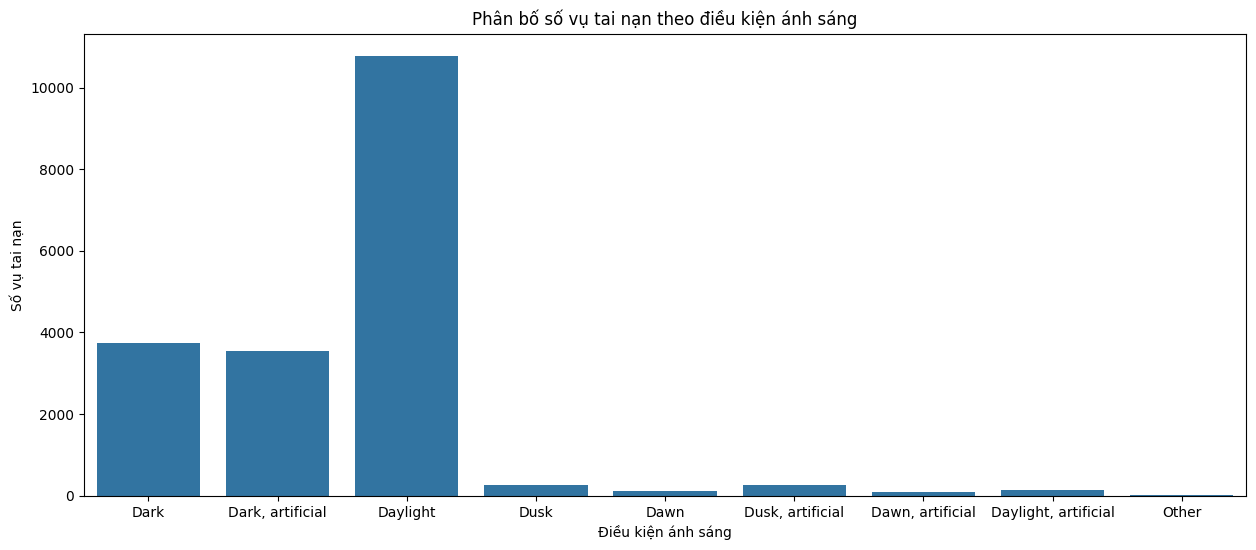

In [62]:
plt.figure(figsize=(15, 6))
sns.countplot(x='LIGHT', data=df)
plt.title('Phân bố số vụ tai nạn theo điều kiện ánh sáng')
plt.xlabel('Điều kiện ánh sáng')
plt.ylabel('Số vụ tai nạn')
plt.show()

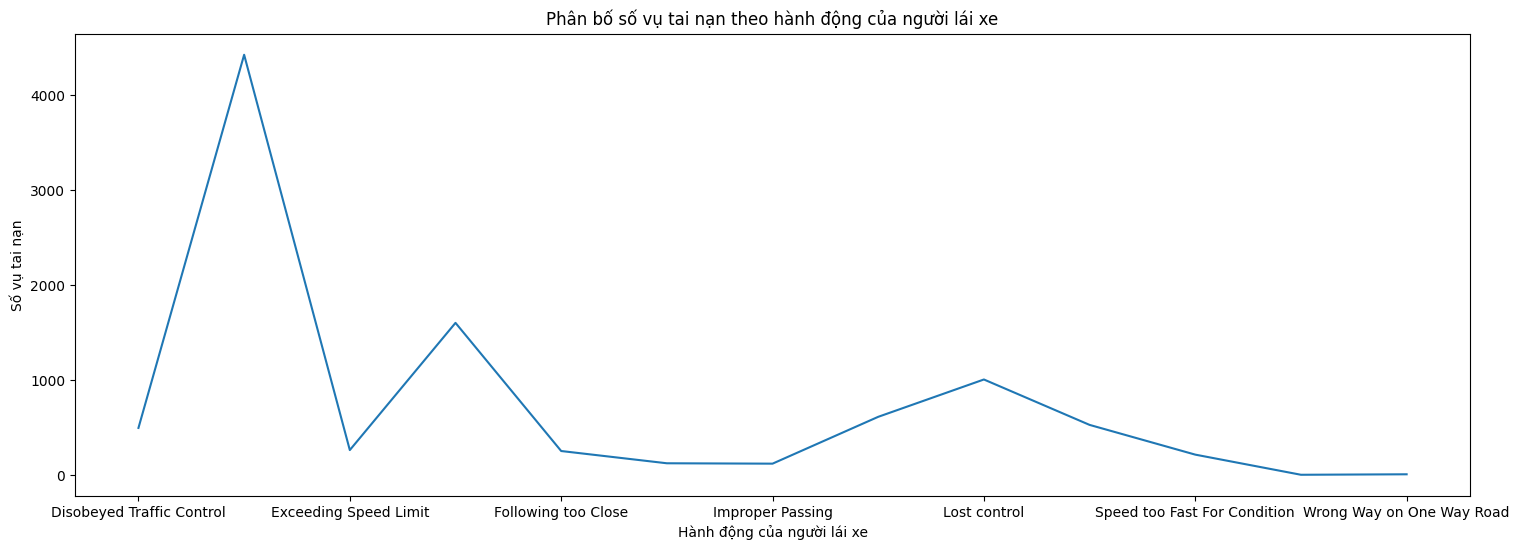

In [63]:
plt.figure(figsize=(18, 6))
df['DRIVACT'].value_counts().sort_index().plot(kind='line')
plt.title('Phân bố số vụ tai nạn theo hành động của người lái xe')
plt.xlabel('Hành động của người lái xe')
plt.ylabel('Số vụ tai nạn')
plt.show()

In [64]:
plt.figure(figsize=(15, 6))
df['VEHTYPE'].value_counts().plot(kind='bar')
plt.title('Phân bố số vụ tai nạn theo loại phương tiện')
plt.xlabel('Loại phương tiện')
plt.ylabel('Số vụ tai nạn')
plt.show()


**Đa Biến**

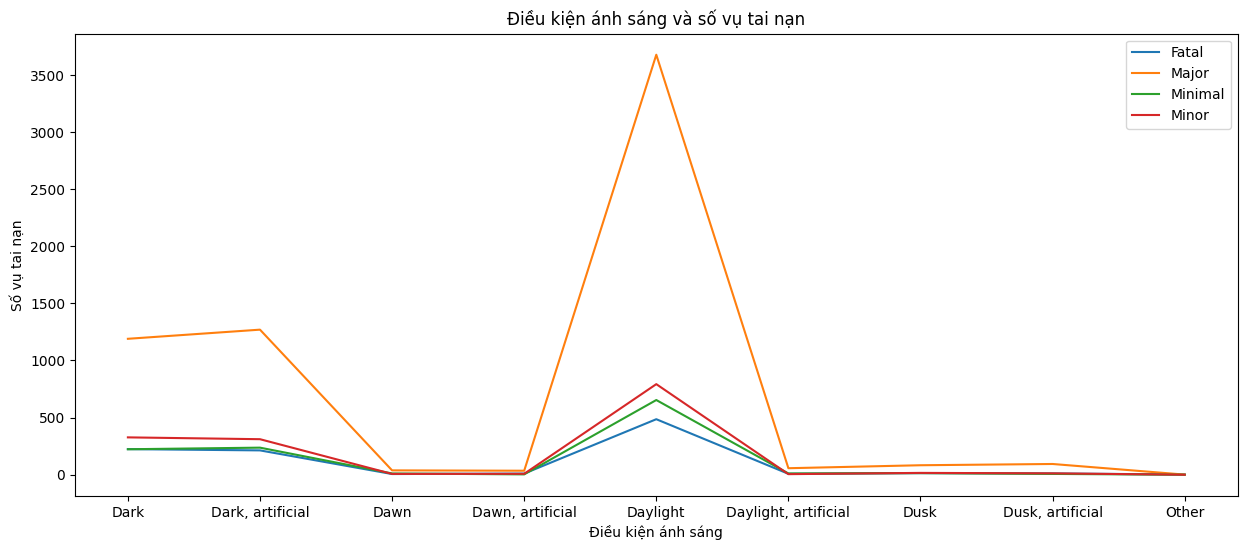

In [92]:
plt.figure(figsize=(15, 6))
injury_count = pd.crosstab(df['LIGHT'], df['INJURY'])
for col in injury_count.columns:
    injury_count[col].plot(label=f'{col}')
plt.title('Điều kiện ánh sáng và số vụ tai nạn')
plt.xlabel('Điều kiện ánh sáng')
plt.ylabel('Số vụ tai nạn')
plt.legend()
plt.show()

In [97]:
important_vehicle_types = veh_counts.sum().nlargest(5).index.tolist()
plt.figure(figsize=(18, 10))
veh_counts[important_vehicle_types].plot(kind='bar', stacked=True)
plt.title('Điều kiện ánh sáng và TOP phương tiện tại nạn')
plt.xlabel('Điều kiện ánh sáng')
plt.ylabel('Số lượng phương tiện')
plt.legend(title='Loại phương tiện')
plt.show()

<Figure size 1800x1000 with 0 Axes>